In [0]:
#DF: Data Cleaning and Data Preparation: Defining Filename Variables 
#Writing general-reusable code to ensure switching between different versions ("Clinicaltrial_<year>.csv") of the datasets that require only the change of one variable. Implemented using "filename<#>" variables which are defined for each file name that needs to be prepared.  
filename1 = "clinicaltrial_2021"
filename2 = "pharma"

#Local filesystem or shell command line doesn’t understand the"filename” variable. Hence, creating an OS variable for this variable accessible by the command line using the following script, so as to remove the existing zip files at the Temporary filesystem in the next shell command line
import os
os.environ['filename1'] = filename1
os.environ['filename2'] = filename2

In [0]:
#DF: Data Cleaning: Cleaning the local file system and the DBFS from the contents that the notebook needs to create again.
#Following is mandatory to make this notebook rerunnable,
#1) Removing two existing .csv files(clinicaltrial_2021.csv and pharma.csv) from the Default location of the Databricks File System(DBFS) "FileStore/tables/" (Done in python command line)
#2) Removing Two existing Zip files(clinicaltrial_2021.zip and pharma.zip) from Temporary filesystem "file:/tmp/" (Done in Shell command line)

dbutils.fs.rm("FileStore/tables/"+ filename1 +".csv" ) 
dbutils.fs.rm("FileStore/tables/"+ filename2 +".csv" ) 

Out[2]: True

In [0]:
%sh 
rm /tmp/$filename1.zip
rm /tmp/$filename2.zip


In [0]:
#DF: Data Preparation - Step 1 : Verifying the existence of 2 uploaded Zip files  clinicaltrial_2021.zip and pharma.zip, at "/FileStore/tables/"  which is the Databricks File System(DBFS) where the Databricks UI uploads the file by default.
dbutils.fs.ls("/FileStore/tables/")

Out[4]: [FileInfo(path='dbfs:/FileStore/tables/ accounts/', name=' accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/ logs/', name=' logs/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/ webpage/', name=' webpage/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/CT2021DF_FA2.csv/', name='CT2021DF_FA2.csv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/CT2021Q5DF.csv/', name='CT2021Q5DF.csv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/FaultDataset.csv', name='FaultDataset.csv', size=1703184, modificationTime=1677847177000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data-1.csv', name='Occupancy_Detection_Data-1.csv', size=50968, modificationTime=1677836655000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1677686371000),
 FileInfo(path='dbfs:/FileStore/tables/Q

In [0]:
#DF: Data Preparation - Step 2 : Extracting two zip files.
#dbutils toolkit doesn't provide an unzip command. Therefore, the files needed to be copied to the driver node (local file system), extract there using a shell command, and copy back the extracted content into DBFS.
#Now, Copying the 2 uploaded .zip files from DBFS to local file system

dbutils.fs.cp("FileStore/tables/" + filename1 + ".zip", "file:/tmp/")
dbutils.fs.cp("FileStore/tables/" + filename2 + ".zip", "file:/tmp/")

Out[5]: True

In [0]:
%sh
unzip -d /tmp/ /tmp/$filename1.zip
unzip -d /tmp/ /tmp/$filename2.zip

Archive:  /tmp/clinicaltrial_2021.zip
  inflating: /tmp/clinicaltrial_2021.csv  
Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


In [0]:
#DF: Data Preparation - Step 4 : Verifying the unzipped files existence in the Local file system 
#unzipped files are available under /tmp/clinicaltrial_2021.csv  There are single files each
dbutils.fs.ls("file:/tmp/")

Out[7]: [FileInfo(path='file:/tmp/hsperfdata_root/', name='hsperfdata_root/', size=4096, modificationTime=1681991840672),
 FileInfo(path='file:/tmp/RtmpO55ruU/', name='RtmpO55ruU/', size=4096, modificationTime=1681990831056),
 FileInfo(path='file:/tmp/driver-daemon-params', name='driver-daemon-params', size=19, modificationTime=1681990698032),
 FileInfo(path='file:/tmp/tmpqqagh6ic/', name='tmpqqagh6ic/', size=4096, modificationTime=1681991292558),
 FileInfo(path='file:/tmp/.ICE-unix/', name='.ICE-unix/', size=4096, modificationTime=1681990673952),
 FileInfo(path='file:/tmp/.font-unix/', name='.font-unix/', size=4096, modificationTime=1681990673952),
 FileInfo(path='file:/tmp/tmp72utc2yq/', name='tmp72utc2yq/', size=4096, modificationTime=1681991533085),
 FileInfo(path='file:/tmp/tmp5pog9gwt/', name='tmp5pog9gwt/', size=4096, modificationTime=1681991165823),
 FileInfo(path='file:/tmp/tmpdk_m1_ee/', name='tmpdk_m1_ee/', size=4096, modificationTime=1681991112131),
 FileInfo(path='file:/tm

In [0]:
#DF: Data Preparation - Step 5 : Moving the 2 unzipped files from Local file system to DBFS
dbutils.fs.mv("file:/tmp/" + filename1+".csv" , "FileStore/tables/" + filename1 +".csv", True)
dbutils.fs.mv("file:/tmp/" + filename2+".csv" , "FileStore/tables/" + filename2 +".csv", True)

Out[8]: True

In [0]:
#DF: Data Preparation - Step 6 :  Verifying the existence of the moved .csv files in the DBFS
dbutils.fs.ls("/FileStore/tables/")

Out[9]: [FileInfo(path='dbfs:/FileStore/tables/ accounts/', name=' accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/ logs/', name=' logs/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/ webpage/', name=' webpage/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/CT2021DF_FA2.csv/', name='CT2021DF_FA2.csv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/CT2021Q5DF.csv/', name='CT2021Q5DF.csv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/FaultDataset.csv', name='FaultDataset.csv', size=1703184, modificationTime=1677847177000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data-1.csv', name='Occupancy_Detection_Data-1.csv', size=50968, modificationTime=1677836655000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1677686371000),
 FileInfo(path='dbfs:/FileStore/tables/Q

In [0]:
#DF: Data Preparation - Step 7 :Data Verification 
#Checking the first few lines of the clinicaltrial_2021.csv file to understand the data format 
dbutils.fs.head("FileStore/tables/" + filename1 +".csv")

[Truncated to first 65536 bytes]
Out[10]: "Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions\r\nNCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||\r\nNCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|\r\nNCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|\r\nNCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|\r\nNCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|\r\nNCT02757209|Consorzio Futuro in Ricerca|Completed|Apr 2016|Jan 2018|Interventional|Apr 2016|Asthma|Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate\r\nNCT02752438|Ankara University|Unk

In [0]:
#DF: Data Preparation - Step 8 :Data Verification 
#Checking the first few lines of the pharma.csv to understand the data format 
dbutils.fs.head("FileStore/tables/" + filename2 +".csv")

[Truncated to first 65536 bytes]
Out[11]: '"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"\n"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to in

In [0]:
#DF: Data Preparation - Step 9 : Loading the data from the 2 CSV files to Spark Dataframes using spark.read.csv method()
#clinicaltrial_2021.csv is delimited by piping | symbol 
#pharma.csv is delimited by comma ,  symbol  
from pyspark.sql.types import* 

ct21DF = spark.read.csv("/FileStore/tables/"+ filename1 +".csv", header ="true", inferSchema="true", sep="|")
PharmaDF = spark.read.csv("/FileStore/tables/"+ filename2 +".csv", header ="true", inferSchema="true", sep=",")

In [0]:
#DF: Data Preparation - Step 10 : Viewing few contents of the ClinicalTrial Dataframe
display(ct21DF.limit(15))


Id,Sponsor,Status,Start,Completion,Type,Submission,Conditions,Interventions
NCT02758028,The University of Hong Kong,Recruiting,Aug 2005,Nov 2021,Interventional,Apr 2016,null,null
NCT02751957,Duke University,Completed,Jul 2016,Jul 2020,Interventional,Apr 2016,"Autistic Disorder,Autism Spectrum Disorder",null
NCT02758483,Universidade Federal do Rio de Janeiro,Completed,Mar 2017,Jan 2018,Interventional,Apr 2016,Diabetes Mellitus,null
NCT02759848,Istanbul Medeniyet University,Completed,Jan 2012,Dec 2014,Observational,May 2016,"Tuberculosis,Lung Diseases,Pulmonary Disease",null
NCT02758860,University of Roma La Sapienza,"Active, not recruiting",Jun 2016,Sep 2020,Observational [Patient Registry],Apr 2016,"Diverticular Diseases,Diverticulum,Diverticulosis",null
NCT02757209,Consorzio Futuro in Ricerca,Completed,Apr 2016,Jan 2018,Interventional,Apr 2016,Asthma,"Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate"
NCT02752438,Ankara University,Unknown status,May 2016,Jul 2017,Observational [Patient Registry],Apr 2016,Hypoventilation,null
NCT02753543,Ruijin Hospital,Unknown status,Nov 2015,Nov 2019,Interventional,Apr 2016,Lymphoma,null
NCT02757508,Washington University School of Medicine,Completed,Mar 2016,Jul 2017,Interventional,Apr 2016,null,Vitamins
NCT02753530,Orphazyme,Completed,Aug 2017,Jan 2021,Interventional,Apr 2016,Myositis,null


In [0]:
#DF: Data Preparation - Step 11 : Printing the Schema of the ClinicalTrial Dataframe
ct21DF.printSchema()

root
 |-- Id: string (nullable = true)
 |-- Sponsor: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- Start: string (nullable = true)
 |-- Completion: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Submission: string (nullable = true)
 |-- Conditions: string (nullable = true)
 |-- Interventions: string (nullable = true)



In [0]:
#DF: Data Preparation - Step 11 : Printing the Schema of the Pharma Dataframe
PharmaDF.printSchema()

root
 |-- Company: string (nullable = true)
 |-- Parent_Company: string (nullable = true)
 |-- Penalty_Amount: string (nullable = true)
 |-- Subtraction_From_Penalty: string (nullable = true)
 |-- Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting: string (nullable = true)
 |-- Penalty_Year: integer (nullable = true)
 |-- Penalty_Date: integer (nullable = true)
 |-- Offense_Group: string (nullable = true)
 |-- Primary_Offense: string (nullable = true)
 |-- Secondary_Offense: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Level_of_Government: string (nullable = true)
 |-- Action_Type: string (nullable = true)
 |-- Agency: string (nullable = true)
 |-- Civil/Criminal: string (nullable = true)
 |-- Prosecution_Agreement: string (nullable = true)
 |-- Court: string (nullable = true)
 |-- Case_ID: string (nullable = true)
 |-- Private_Litigation_Case_Title: string (nullable = true)
 |-- Lawsuit_Resolution: string (nullable = true)
 |-- Facility_State: string

In [0]:
#DataFrame Question Number : 1  
# Finding Count of Distinct Studies w.r.to ID column which is an unique column in ct21DF
#countDistinct("Id") #ref. Book: Spark-the-definitive-guide page 126
from pyspark.sql.types import* 
Distinct_Studies_2021 =  ct21DF.select(ct21DF.Id).distinct().count()
print("Distinct number of studies in the given ClinicalTrial dataset:", Distinct_Studies_2021)

Distinct number of studies in the given ClinicalTrial dataset: 387261


In [0]:
#DataFrame Question Number : 2   Find the Distinct count of Types in ClinicalTrial_2021

#imported the pyspark.sql.functions to use the AGGREGATE Function agg
from pyspark.sql.functions import *

#Applying the agg() method to groupBy 'Type' column and counting i.e, aggregating on the same column gives the result.
ct21DF.groupby("Type").agg(count("Type").alias("2021_Type_Count")).sort(desc("2021_Type_Count")).display()

Type,2021_Type_Count
Interventional,301472
Observational,77540
Observational [Patient Registry],8180
Expanded Access,69


In [0]:
#DataFrame Question 3: Finding the top 5 most common Conditions in ClinicalTrial_2021
#Its been found that Conditions column contains multivalues seperated by commas
#Hence, applied the explode() method to split the Conditions column by comma symbol and then applied the groupby method and counting i.e, aggregating on the same column gives the result
CT21Q3_SplitDF = (ct21DF.select(explode(split(ct21DF.Conditions,",")).alias("CL_Conditions_2021")))
CT21Q3_SplitDF.groupBy("CL_Conditions_2021").agg(count("CL_Conditions_2021").alias("Count_2021")).sort(desc("Count_2021")).show(5)

+------------------+----------+
|CL_Conditions_2021|Count_2021|
+------------------+----------+
|         Carcinoma|     13389|
| Diabetes Mellitus|     11080|
|         Neoplasms|      9371|
|  Breast Neoplasms|      8640|
|          Syndrome|      8032|
+------------------+----------+
only showing top 5 rows



In [0]:
#DataFrame:Q4:  First Approach using JOIN CONCEPT of type LEFT_ANTI.
#Ref.: page 145 in Spark the Definitive Guide
Q4_ct21DF1 = (ct21DF.select(ct21DF.Sponsor))
joinExpression = Q4_ct21DF1["Sponsor"] == PharmaDF ['Parent_Company']
Q4ct21_subtractDF1 = Q4_ct21DF1.join(PharmaDF, joinExpression,"left_anti")
Q4ct21_subtractDF1.groupBy("Sponsor").agg(count("Sponsor").alias("Count_2021")).sort(desc("Count_2021")).show(10, truncate =False)

+---------------------------------------+----------+
|Sponsor                                |Count_2021|
+---------------------------------------+----------+
|National Cancer Institute (NCI)        |3218      |
|M.D. Anderson Cancer Center            |2414      |
|Assistance Publique - Hôpitaux de Paris|2369      |
|Mayo Clinic                            |2300      |
|Merck Sharp & Dohme Corp.              |2243      |
|Assiut University                      |2154      |
|Novartis Pharmaceuticals               |2088      |
|Massachusetts General Hospital         |1971      |
|Cairo University                       |1928      |
|Hoffmann-La Roche                      |1828      |
+---------------------------------------+----------+
only showing top 10 rows



In [0]:
#DataFrame Question#: 4 - Second Approach of Analysis using Subquery Concept 
#DF Q4: Step1:Extracting the 'Sponsor' values into the Dataframe Q4_ct21DF
Q4_ct21DF = (ct21DF.select(ct21DF.Sponsor))
Q4_ct21DF.show(5)

+--------------------+
|             Sponsor|
+--------------------+
|The University of...|
|     Duke University|
|Universidade Fede...|
|Istanbul Medeniye...|
|University of Rom...|
+--------------------+
only showing top 5 rows



In [0]:
#DFQ4:Step2: Extracting the Distinct values of 'Parent_Company' column into PharmaDF Dataframe 
PharmaDF1 = (PharmaDF.select(PharmaDF.Parent_Company).distinct())
PharmaDF1.show(5)
print("Count of Distinct Parent_Company: ", PharmaDF1.count())
#Creating a list Distinct 'Parent_Company' values
PharmaList = PharmaDF1.select('Parent_Company').rdd.flatMap(lambda x: x).collect()
PharmaList

+-------------------+
|     Parent_Company|
+-------------------+
|             AbbVie|
|              Amgen|
|  Johnson & Johnson|
|             Pfizer|
|Abbott Laboratories|
+-------------------+
only showing top 5 rows

Count of Distinct Parent_Company:  72
Out[21]: ['Curia Inc.',
 'AbbVie',
 'Teva Pharmaceutical Industries',
 'Jazz Pharmaceuticals',
 'Pacira BioSciences',
 'Amgen',
 'Nutraceutical International Corp.',
 'CSL Limited',
 'Apotex Corp.',
 'Phibro Animal Health',
 'Sanofi',
 'Merck',
 'Johnson & Johnson',
 'Elanco Animal Health',
 'Novartis',
 'Wockhardt Limited',
 'IDEXX Laboratories',
 'Pfizer',
 'SELLAS Life Sciences Group',
 'Mallinckrodt',
 'Insys Therapeutics',
 'Endo International',
 'Viatris',
 'Sun Pharmaceuticals',
 'Daiichi Sankyo',
 'Takeda Pharmaceutical',
 'Abbott Laboratories',
 'Zoetis',
 'Taro Pharmaceutical Industries',
 'Roche',
 'UCB',
 'KV Pharmaceutical',
 'Cambrex',
 'Hikma Pharmaceuticals',
 'Astellas Pharma',
 'CytRx',
 'Clovis Oncology',
 'Amn

In [0]:
#DFQ4:Step3: Filtered ClinicalTrial’s Non-Pharma 'Sponsor' against PharmaList using ~ tilde symbol
Q4ct21_subtractDF = (Q4_ct21DF.filter(~ Q4_ct21DF["Sponsor"].isin(PharmaList)))
Q4ct21_subtractDF.show(10, truncate = False)
print("Count of Subracted DataFrame: ", Q4ct21_subtractDF.count())

+----------------------------------------+
|Sponsor                                 |
+----------------------------------------+
|The University of Hong Kong             |
|Duke University                         |
|Universidade Federal do Rio de Janeiro  |
|Istanbul Medeniyet University           |
|University of Roma La Sapienza          |
|Consorzio Futuro in Ricerca             |
|Ankara University                       |
|Ruijin Hospital                         |
|Washington University School of Medicine|
|Orphazyme                               |
+----------------------------------------+
only showing top 10 rows

Count of Subracted DataFrame:  371001


In [0]:
#DFQ4:Step4: Filtered Sponsor Column is renamed as 'Non_PharmaSponsors' using withColumnRenamed() Spark method. Applied groupBy on 'Non_PharmaSponsors' column to get final result
Q4ct21_subtractDF = Q4ct21_subtractDF.withColumnRenamed("Sponsor","Non_PharmaSponsors")
Q4ct21_subtractDF.groupBy("Non_PharmaSponsors").agg(count("Non_PharmaSponsors").alias("Count_2021")).sort(desc("Count_2021")).show(10, truncate =False)

+---------------------------------------+----------+
|Non_PharmaSponsors                     |Count_2021|
+---------------------------------------+----------+
|National Cancer Institute (NCI)        |3218      |
|M.D. Anderson Cancer Center            |2414      |
|Assistance Publique - Hôpitaux de Paris|2369      |
|Mayo Clinic                            |2300      |
|Merck Sharp & Dohme Corp.              |2243      |
|Assiut University                      |2154      |
|Novartis Pharmaceuticals               |2088      |
|Massachusetts General Hospital         |1971      |
|Cairo University                       |1928      |
|Hoffmann-La Roche                      |1828      |
+---------------------------------------+----------+
only showing top 10 rows



In [0]:
#DataFrame Question# 5: Step1: Filtering rows with Completed 'Status' and Completion on the Year 2021
CT21Q5DF = (ct21DF.filter((ct21DF.Status == "Completed")  & ct21DF.Completion.like("%2021")))
CT21Q5DF.show()

+-----------+--------------------+---------+--------+----------+--------------------+----------+--------------------+--------------------+
|         Id|             Sponsor|   Status|   Start|Completion|                Type|Submission|          Conditions|       Interventions|
+-----------+--------------------+---------+--------+----------+--------------------+----------+--------------------+--------------------+
|NCT02753530|           Orphazyme|Completed|Aug 2017|  Jan 2021|      Interventional|  Apr 2016|            Myositis|                null|
|NCT02758704|St. Justine's Hos...|Completed|Oct 2015|  Jun 2021|      Interventional|  Apr 2016|                null|                null|
|NCT02754778|Martin-Luther-Uni...|Completed|Apr 2016|  Mar 2021|      Interventional|  Apr 2016|Pre-Eclampsia,HEL...|                null|
|NCT02758782|Charite Universit...|Completed|Sep 2016|  Jan 2021|      Interventional|  Apr 2016|         Spondylitis| Celecoxib,Golimumab|
|NCT02751151|Inova Health C

In [0]:
#DF Q5: Step2: Creating Two seperate columns 'Month2021' by first 3 Characters of Completion column and  'MonthNum' Column by Converting the Month Name first 3 Characters of 'Completion' column to number using from_unixtime(unix_timestamp()) methods in PySpark
#REF: https://stackoverflow.com/questions/62442352/convert-month-name-to-number-in-pyspark
CT21Q5DF_2 = CT21Q5DF.withColumn('Month2021', col('Completion').substr(0,3)).withColumn("MonthNum",from_unixtime(unix_timestamp(col("Month2021"),'MMM'),'MM'))
CT21Q5DF_2.show()

+-----------+--------------------+---------+--------+----------+--------------------+----------+--------------------+--------------------+---------+--------+
|         Id|             Sponsor|   Status|   Start|Completion|                Type|Submission|          Conditions|       Interventions|Month2021|MonthNum|
+-----------+--------------------+---------+--------+----------+--------------------+----------+--------------------+--------------------+---------+--------+
|NCT02753530|           Orphazyme|Completed|Aug 2017|  Jan 2021|      Interventional|  Apr 2016|            Myositis|                null|      Jan|      01|
|NCT02758704|St. Justine's Hos...|Completed|Oct 2015|  Jun 2021|      Interventional|  Apr 2016|                null|                null|      Jun|      06|
|NCT02754778|Martin-Luther-Uni...|Completed|Apr 2016|  Mar 2021|      Interventional|  Apr 2016|Pre-Eclampsia,HEL...|                null|      Mar|      03|
|NCT02758782|Charite Universit...|Completed|Sep 2016

In [0]:
#DF Q5: Step3: Applying groupBy on 'Month2021', 'MonthNum' columns and aggregation on MonthNum
CT21Q5DF_3 = CT21Q5DF_2.groupBy(CT21Q5DF_2.Month2021,CT21Q5DF_2.MonthNum).agg(count(CT21Q5DF_2.Month2021).alias("Count")).sort("MonthNum") 
#Now, the 'MonthNum' column is renamed into Serial Number for sorting by Month names
CT21Q5DF_4 =CT21Q5DF_3.select(CT21Q5DF_3.MonthNum.alias("S_No"),CT21Q5DF_3.Month2021.alias("CompletionMonth_2021"),CT21Q5DF_3.Count.alias("CompletedStudies_2021"))
CT21Q5DF_4.show()

+----+--------------------+---------------------+
|S_No|CompletionMonth_2021|CompletedStudies_2021|
+----+--------------------+---------------------+
|  01|                 Jan|                 1131|
|  02|                 Feb|                  934|
|  03|                 Mar|                 1227|
|  04|                 Apr|                  967|
|  05|                 May|                  984|
|  06|                 Jun|                 1094|
|  07|                 Jul|                  819|
|  08|                 Aug|                  700|
|  09|                 Sep|                  528|
|  10|                 Oct|                  187|
+----+--------------------+---------------------+



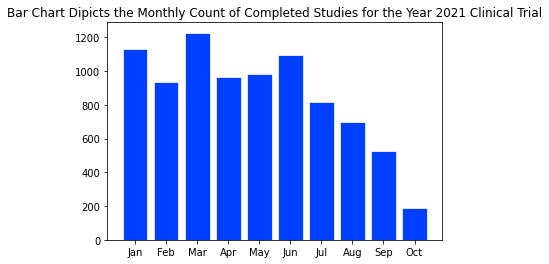

In [0]:
##DF Q5: Step4: Two Visualizations implemented for DF Q#5: 1)matplotlib Python library and 2)PowerBI
#Below Visualization code is using MATPLOTLIB
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')
#('seaborn-bright') #('ggplot') #('classic')   #seaborn-paper
CT52021_DF_Vis = CT21Q5DF_4.toPandas()
fig, ax = plt.subplots()
x = CT52021_DF_Vis['CompletionMonth_2021']
y = CT52021_DF_Vis['CompletedStudies_2021']
ax.bar(x, y, width=0.8, edgecolor="white", linewidth=0.7)
ax.set_title('Bar Chart Dipicts the Monthly Count of Completed Studies for the Year 2021 Clinical Trial')
plt.show()

In [0]:
#DF Q5: Step5 : Result is written to a CSV file for creating SQL table for generating POWERBI visualization. However, .csv file is priorly deleted to ensure code reusability.
dbutils.fs.rm("/FileStore/tables/CT2021Q5DF.csv", True )  
CT21Q5DF_4.write.format('com.databricks.spark.csv') \
  .mode('overwrite').option("header", "True").save("/FileStore/tables/CT2021Q5DF.csv")

In [0]:
%sql
--#DF Q5: Step6 :Table creation for Generating Visualization for Question 5 using POWER BI
DROP TABLE IF EXISTS CT2021DFQ5_CompletedStudies;
CREATE TABLE CT2021DFQ5_CompletedStudies
using csv
options (path "dbfs:/FileStore/tables/CT2021Q5DF.csv", header "True" , inferSchema "True");
SHOW TABLES;
SELECT * FROM CT2021DFQ5_CompletedStudies;

S_No,CompletionMonth_2021,CompletedStudies_2021
1,Jan,1131
2,Feb,934
3,Mar,1227
4,Apr,967
5,May,984
6,Jun,1094
7,Jul,819
8,Aug,700
9,Sep,528
10,Oct,187


In [0]:
#DataFrame Question#6 - Further analysis 1 
#Pharma Sponsors' 10 most common Conditions Count for the Year 2021 in the CT 2021
#Extracting Sponsor and Applied the explode() method to split the 'Conditions' column by comma symbol 
CT21FA1_SplitDF = (ct21DF.select(ct21DF.Sponsor, explode(split(ct21DF.Conditions,",")) .alias("PharmaSponsor_Conditions_2021")))
#Applied the groupby method to groupBy Sponsor and Conditions with counting i.e, aggregating on the conditions column gives the result 
ResultDF = CT21FA1_SplitDF.groupBy("Sponsor","PharmaSponsor_Conditions_2021").agg(count("PharmaSponsor_Conditions_2021").alias("Conditions_Count")).sort(desc("Conditions_Count"))
ResultDF.show(10)

+--------------------+-----------------------------+----------------+
|             Sponsor|PharmaSponsor_Conditions_2021|Conditions_Count|
+--------------------+-----------------------------+----------------+
|National Cancer I...|                    Carcinoma|             748|
|    Novo Nordisk A/S|            Diabetes Mellitus|             667|
|National Heart, L...|         Cardiovascular Di...|             483|
|National Cancer I...|                    Neoplasms|             483|
|National Heart, L...|               Heart Diseases|             454|
|M.D. Anderson Can...|                    Neoplasms|             442|
|M.D. Anderson Can...|                     Leukemia|             391|
|National Cancer I...|                     Lymphoma|             361|
|National Cancer I...|                     Leukemia|             357|
|M.D. Anderson Can...|                    Carcinoma|             349|
+--------------------+-----------------------------+----------------+
only showing top 10 

In [0]:
#DF Q#6: Step2: Further analysis 1 - 2021
#Applied Join concept to filter only Pharmaceutical Sponsors from ResultDF
#PharmaDF1 contains the distinct values of Parent_Company column (ref: cmd21 for #DFQ4:Step2)
Joined_DF = PharmaDF1.join(ResultDF, PharmaDF1.Parent_Company == ResultDF.Sponsor)
#Now, display the result selecting the Sponsor, Conditions and aggregate of Condition sorted in Descending order
Final_DF = (Joined_DF.select(Joined_DF.Sponsor,Joined_DF.PharmaSponsor_Conditions_2021,Joined_DF.Conditions_Count)).sort(desc("Conditions_Count")).show(10, truncate =False)
#Final_DF = Final_DF.head(10)
display(Final_DF)

+--------------------+-----------------------------+----------------+
|Sponsor             |PharmaSponsor_Conditions_2021|Conditions_Count|
+--------------------+-----------------------------+----------------+
|AstraZeneca         |Diabetes Mellitus            |317             |
|GlaxoSmithKline     |Pulmonary Disease            |246             |
|Sanofi              |Diabetes Mellitus            |238             |
|AstraZeneca         |Asthma                       |233             |
|Boehringer Ingelheim|Pulmonary Disease            |225             |
|AstraZeneca         |Carcinoma                    |203             |
|GlaxoSmithKline     |Asthma                       |194             |
|GlaxoSmithKline     |Influenza                    |187             |
|Boehringer Ingelheim|Lung Diseases                |179             |
|AstraZeneca         |Pulmonary Disease            |168             |
+--------------------+-----------------------------+----------------+
only showing top 10 

<Figure size 864x576 with 0 Axes>

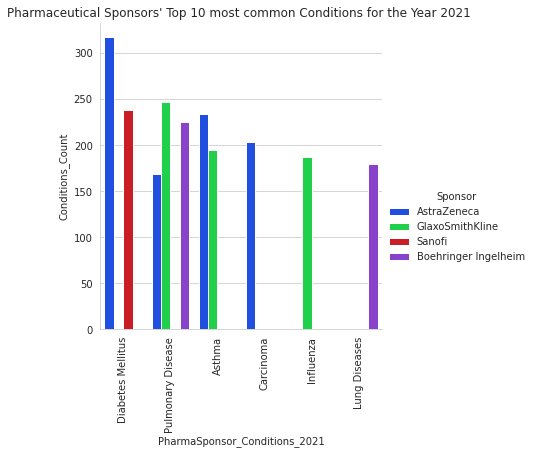

In [0]:
#DF Q#6: Step3: Further analysis 1 : Two Visualizations are implemented for DFQ#6: 1)matplotlib Python library and 2)PowerBI 
#imported Matplotlib, which will help us customize our plots further.
import matplotlib.pyplot as plt
import seaborn as sns 
#https://elitedatascience.com/python-seaborn-tutorial  # Set theme
sns.set_style('whitegrid')
#Couldnot Convert Final_DF to Pandas DF using toPandas() since show attribute show(10, truncate =False) is used. Hence, using same code for creating DF for visualization
Vis_DF = (Joined_DF.select(Joined_DF.Sponsor,Joined_DF.PharmaSponsor_Conditions_2021,Joined_DF.Conditions_Count)).sort(desc("Conditions_Count")).toPandas()
Vis_DF =Vis_DF.head(10)
plt.figure(figsize=(12,8)) # Set plot dimensions
sns.catplot(data=Vis_DF, kind='bar', x='PharmaSponsor_Conditions_2021', y='Conditions_Count', hue='Sponsor')
#To display the X labels vertically that is 90degree
plt.xticks(rotation=90)
plt.title("Pharmaceutical Sponsors' Top 10 most common Conditions for the Year 2021 ")
plt.show()

In [0]:
#DF Q#7:Further Analysis 2 on CT_2021
#Monthly number of Submissions of  'Recruiting' Status Studies that are Completed and Submitted in the year 2021
#DF Q#7: FA2: Step1: Filtering the 'Recruiting' Status Studies that are Completed and Submitted in the year 2021
ct21_FA2DF = (ct21DF.filter((ct21DF.Status == "Recruiting")  & ct21DF.Completion.like("%2021") & ct21DF.Submission.like("%2021")))
print("Recruiting Status Studies Completed and Submitted in 2021: " , ct21_FA2DF.count())
ct21_FA2DF.show()

Recruiting Status Studies Completed and Submitted in 2021:  2589
+-----------+--------------------+----------+--------+----------+--------------------+----------+--------------------+--------------------+
|         Id|             Sponsor|    Status|   Start|Completion|                Type|Submission|          Conditions|       Interventions|
+-----------+--------------------+----------+--------+----------+--------------------+----------+--------------------+--------------------+
|NCT04722406|Sun Yat-sen Unive...|Recruiting|Aug 2019|  Aug 2021|       Observational|  Jan 2021|Lung Neoplasms,Ca...|                null|
|NCT04724200|NHS Greater Glasg...|Recruiting|Jan 2021|  Dec 2021|       Observational|  Jan 2021|       Heart Failure|                null|
|NCT04722627|Atea Pharmaceutic...|Recruiting|Mar 2021|  Oct 2021|      Interventional|  Jan 2021|              Dengue|                null|
|NCT04721951|University of Bol...|Recruiting|Dec 2018|  Sep 2021|Observational [Pa...|  Jan 202

In [0]:
#DF Q#7: FA2: Step2: Creating Two seperate columns 'Submission_Month2021' by first 3 Characters of Completion column and  'MonthNum' Column by Converting the Month Name first 3 Characters of 'Completion' column to number using from_unixtime(unix_timestamp()) methods in PySpark

ct21_FA2DF2 = ct21_FA2DF.withColumn('Submission_Month2021', col('Submission').substr(0,3)).withColumn("S_No",from_unixtime(unix_timestamp(col("Submission_Month2021"),'MMM'),'MM'))

ct21_FA2DF3 = ct21_FA2DF2.groupBy(ct21_FA2DF2.S_No, ct21_FA2DF2.Submission_Month2021).agg(count(ct21_FA2DF2.Submission_Month2021).alias("Recruitings")).sort("S_No") 
ct21_FA2DF3.show() 

+----+--------------------+-----------+
|S_No|Submission_Month2021|Recruitings|
+----+--------------------+-----------+
|  01|                 Jan|        395|
|  02|                 Feb|        346|
|  03|                 Mar|        423|
|  04|                 Apr|        362|
|  05|                 May|        279|
|  06|                 Jun|        257|
|  07|                 Jul|        207|
|  08|                 Aug|        172|
|  09|                 Sep|        108|
|  10|                 Oct|         40|
+----+--------------------+-----------+



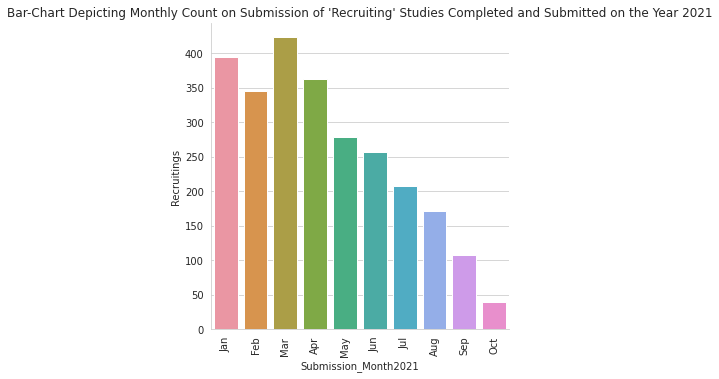

In [0]:
#DFQ#7:FA2:Step3: Visualizations for Further Analysis 2 on 2021 dataset
#Two Visualizations implemented for DF Q#6: 1)matplotlib Python library and 2)PowerBI 
#import Matplotlib, which will help us customize our plots further.
import matplotlib.pyplot as plt
import seaborn as sns
#https://elitedatascience.com/python-seaborn-tutorial
# Set theme
sns.set_style('whitegrid') 
Vis_DF = ct21_FA2DF3.toPandas()
Vis_DF =Vis_DF.head(10)
sns.catplot(data=Vis_DF, kind='bar', x='Submission_Month2021', y='Recruitings')
#To display the X labels vertically that is 90degree
plt.xticks(rotation=90)
plt.title("Bar-Chart Depicting Monthly Count on Submission of 'Recruiting' Studies Completed and Submitted on the Year 2021")
plt.show()

In [0]:
#DFQ#7:FA2: Step4: Result is written to a CSV file for creating SQL table for generating POWERBI visualization. However, .csv file is priorly deleted to ensure code reusability.
dbutils.fs.rm("/FileStore/tables/CT2021DF_FA2.csv", True )  
ct21_FA2DF3.write.format('com.databricks.spark.csv') \
  .mode('overwrite').option("header", "True").save("/FileStore/tables/CT2021DF_FA2.csv")

In [0]:
%sql
--#DFQ#7:FA2: Step5: Creating Table for Generating Visualization in Power BI for this Analysis
DROP TABLE IF EXISTS CT2021DF_RECRUITINGSTUDIES;
CREATE TABLE CT2021DF_RECRUITINGSTUDIES
using csv
options (path "dbfs:/FileStore/tables/CT2021DF_FA2.csv", header "True" , inferSchema "True");
SHOW TABLES;
SELECT * FROM CT2021DF_RECRUITINGSTUDIES;

S_No,Submission_Month2021,Recruitings
1,Jan,395
2,Feb,346
3,Mar,423
4,Apr,362
5,May,279
6,Jun,257
7,Jul,207
8,Aug,172
9,Sep,108
10,Oct,40
